In [9]:
# raytracing tutorial
# 02 - basic sphere intersection (no shading)

In [10]:
import numpy
import matplotlib.pyplot as plt

# plot images in this notebook
%matplotlib inline

In [11]:
# axes x to the right, y upwards. z into the screen (left hand rule)

In [41]:
# sphere object

class Sphere():
    
    def __init__(self, x, y, z, r):
        self.centre = numpy.array([x,y,z])
        self.radius = r
        pass
    
    def status(self):
        print("centre = ", self.centre)
        print("radius = ", self.radius)
        pass

    def intersection(self, camera_location, ray_direction_vector):
        # calculate quadratic determinant "b^2 - 4ac" for ray intersecting circle
        b = (2 * ray_direction_vector * (camera_location - self.centre))
        b2 = b*b
        a = ray_direction_vector * ray_direction_vector
        c = (self.centre - camera_location) * (self.centre - camera_location)
        delta = b2 - (4 * a * c)
        print(delta)
        
        
        intersects = False
        return intersects
        pass

In [42]:
# camera location
camera_location = numpy.array([0,0,-100])

# view port
view_port_location = numpy.array([-10, 0, 0])
view_port_width = 20
view_port_height = 20

# resolution (pixels per unit distance)
resolution = 2

In [43]:
# create sphere
sphere = Sphere(0,0,0,20)
sphere.status()

centre =  [0 0 0]
radius =  20


In [44]:
# create image

image = numpy.zeros([view_port_width * resolution, view_port_height * resolution, 3], dtype='uint8')
print("image shape = ", image.shape)

image shape =  (40, 40, 3)


In [45]:
# main loop is to consider every pixel of the viewport

for pixel_ix in range(image.shape[0]):
    for pixel_iy in range(image.shape[1]):
        
        current_position = view_port_location + numpy.array([pixel_ix/resolution, pixel_iy/resolution, 0])
        #print("current_position", current_position)
        ray_direction_vector = current_position - camera_location
        ray_direction_vector /= numpy.linalg.norm(ray_direction_vector)
        #print(ray_direction_vector)
        
        # calculate  background sky pixel colour from vertical direction of ray
        colour = 100 + int(ray_direction_vector[1] *  3 * 255)
        image[pixel_ix, pixel_iy] = [50, 50, colour]
        
        # check intersection with sphere
        if sphere.intersection(camera_location, ray_direction_vector):
            # colour red if true
            image[pixel_ix, pixel_iy] = [200, 0, 0]
            pass
        
        pass    
    pass

[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00  -7.27595761e-12]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   7.27595761e-12]
[ 0.  0.  0.]
[ 0.  0.  0.]
[ 0.  0.  0.]
[  0.00000000e+00   0.00000000e+00

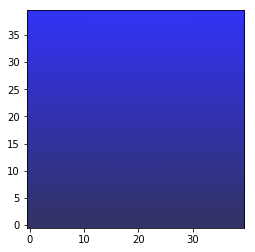

In [40]:
# transpose array so origin is bottom left, by swapping dimensions 0 and 1, but leave dimension 3

image2 = numpy.transpose(image, (1, 0, 2))
plt.imshow(image2, origin='lower')